### Regression

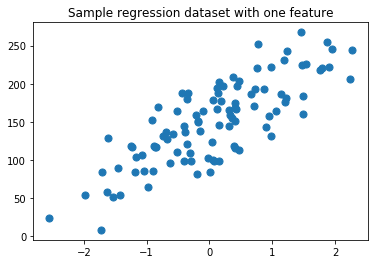

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression dataset with one feature')
X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1,
                            bias=150.0,noise=30,random_state=0)
plt.scatter(X_R1,y_R1,marker='o',s=50)
plt.show()

### K Nearest Neighbor Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train,y_train)
print knn_reg.predict(X_test)
print "R-Squared test score: {:.4f}".format(knn_reg.score(X_test,y_test))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-Squared test score: 0.4247


### Regression model complexity as function of k

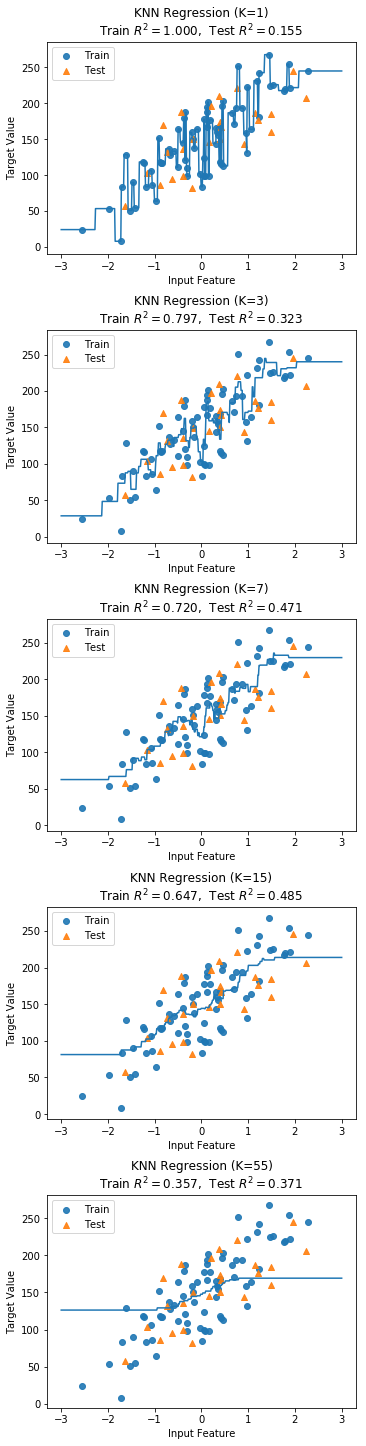

In [19]:
fig,sub_axes = plt.subplots(5,1,figsize=(5,20))
X_R1_train,X_R1_test,y_R1_train,y_R1_test = train_test_split(X_R1,y_R1,random_state=0)
X_predict_input = np.linspace(-3,3,500).reshape(-1,1)
for this_axis,k in zip(sub_axes,[1,3,7,15,55]):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train,y_train)
    y_predict_output = knn_reg.predict(X_predict_input)
    train_score = knn_reg.score(X_R1_train,y_R1_train)
    test_score = knn_reg.score(X_R1_test,y_R1_test)
    this_axis.plot(X_predict_input,y_predict_output)
    this_axis.scatter(X_train,y_train,marker='o',alpha=0.9,label='Train')
    this_axis.scatter(X_test,y_test,marker='^',alpha=0.9,label='Test')
    this_axis.set_xlabel('Input Feature')
    this_axis.set_ylabel('Target Value')
    this_axis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(k, train_score, test_score))
    this_axis.legend()
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
plt.show()

### KNeighborsClassifier and KNeighborsRegressor Important parameters:

#### Model Complexity
* n_neighbors  
Default = 5

#### Model Fitting
* metric:  
Default = Minkowski with p = 2(euclidean)

### Pros and Cons of Using Knn Algorithms

#### Pros:
1. Simple and easy to understand why a particular prediction is made.
+ Can be a reasonable baseline against what we can compare performance
of more sophisticated methods.

#### Cons:
1. Performance slows down in case the dataset has 100 or 1000 of features, especially
when the data is sparse.